# Notes: Hodgkin-Huxley Model(https://neuronaldynamics.epfl.ch/online/Ch2.S2.html)

## Definition of the model

<img src='figures/6-2.2.png'/>

If an input current $I(t)$ is injected into the cell, it may add further charge on the capacitor, or leak through the channels in the cell membrane. 

The unspecific channel has a **leak resistance** $R$, the **sodium channel a resistance** $R_{Na}$ and the **potassium channel a resistance** $R_K$. 

Since the **Nernst potential** is different for each ion type, there are separate batteries for sodium, potassium, and the unspecific third channel, with battery voltages $E_{Na}$,$E_K$ and $E_L$, respectively.

The conservation of electric charge on a piece of membrane implies that the **applied current** $I(t)$ may be split in a **capacitive current** $I_C$ which charges the **capacitor** $C$ and further components $I_k$ which pass through the ion channels. Thus

$$I(t)=I_C(t)+\sum_k I_k(t)$$

In the standard **Hodgkin-Huxley model** there are only three types of channel: 
* a sodium channel with index $Na$, 
* a potassium channel with index $K$ and 
* an unspecific leakage channel with resistance $R$

From the definition of a capacity $C=q/u$ where $q$ is a charge and $u$ the voltage across the capacitor, we find the charging current $I_C=C \mathrm{d}u/\mathrm{d}t$.

$$C \frac{\mathrm{d}u}{\mathrm{d}t}=-\sum_k I_k(t)+I(t)$$


**leakage channel**

The **leakage channel** is described by a voltage-independent conductance $g_L=1/R$. Since u is the total voltage across the cell membrane and $E_L$ the voltage of the battery, the voltage at the leak resistor in Fig. 2.2 is $u−E_L$. Using **Ohm’s law**, we get a **leak current** $I_L=gL(u−E_L)$.

**ion channel**

they introduced additional 'gating' variables $m$,$n$ and $h$ to model the probability that a channel is open at a given moment in time. The combined action of $m$ and $h$ controls the $Na^+$ channels while the $K^+$ gates are controlled by $n$. For example, 

the **effective conductance of sodium channels** is modeled as $1/R_{Na}=g_{Na} m^3 h$, where 

$m$ describes the **activation (opening) of the channel** and 

$h$ **its inactivation (blocking)**. 

The conductance of potassium is $1/R_K=g_K n^4$, where 

$n$ describes the **activation of the channel**.

In summary, Hodgkin and Huxley formulated the three ion currents 

$$\sum_k I_k=g_{Na} m^3 h (u-E_{Na})+g_K n^4 (u-E_K)+g_L(u-E_L)$$

The parameters $E_{Na}$,$E_{K}$ and $E_{L}$ are the **reversal potentials**.

The three gating variables $m$, $n$, and $h$ evolve according to differential equations of the form

$$\frac{\mathrm{d}x}{\mathrm{d}t}=-\frac{1}{\tau_x(u)}\left[x-x_0(u)\right]$$

where $x$ stands for $m$,$n$ or $h$.

For a fixed voltage $u$, the variable $x$ approaches the target value $x_0(u)$ with a time constant $\tau_x(u)$

### Example:Voltage Step

Experimentalists can hold the voltage across the cell membrane at a desired value by **injecting an appropriate current** into the cell. 

Suppose that the experimentalist keeps the cell at resting potential $u_0=−65 mV$ for $t<t_0$ and switches the voltage at $t_0$ to a new value $u_1$. Integration of the differential equation (2.6) gives, **for $t>t_0$**, the dynamics


$$m(t)=m_0(u_1)+\left[m_0(u_0)-m_0(u_1)\right]exp\left[\frac{-(t-t_0)}{\tau_m(u_1)}\right]$$

$$h(t)=h_0(u_1)+\left[h_0(u_0)-h_0(u_1)\right]exp\left[\frac{-(t-t_0)}{\tau_h(u_1)}\right]$$

$$n(t)=n_0(u_1)+\left[n_0(u_0)-n_0(u_1)\right]exp\left[\frac{-(t-t_0)}{\tau_n(u_1)}\right]$$

## Stochastic Channel Opening

## Dynamics

### Ion channel dyanmics during spike generation

#### Example: Damped Oscillations and Transient Spiking

A spike which is elicited by a step current that starts from a strong negative value and then switches back to zero, would be called a **rebound spike**. In other words, a **rebound spike** is ***triggered by release from inhibition***. For example, the Hodgkin-Huxley model with the original parameters for the giant axon of the squid exhibits **rebound spikes** when a prolonged negative input current is stopped; the model with the set of parameters adopted in this book, however, does not.

# Codes:[Numerical integration of the HH model of the squid axon](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html)

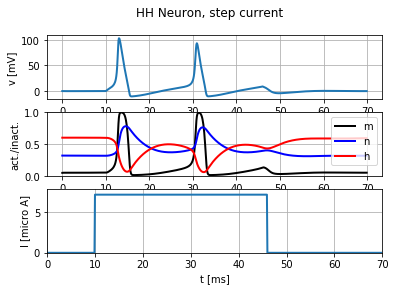

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

HH.getting_started()

## Exercise: step current response

### Question

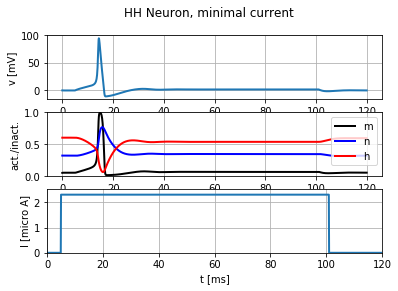

In [15]:
I_min=2.31
current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

### Question

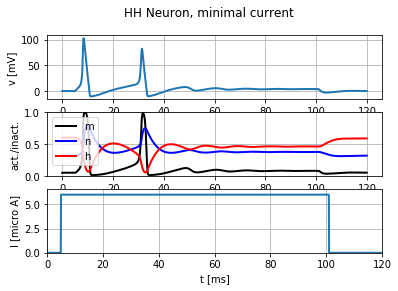

In [40]:
# object 1
I_min=6
current = input_factory.get_step_current(5, 100, 
                                         b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

## Exercise: slow and fast ramp current

### Question

In [214]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 50  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(
    5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(
    slow_ramp_current, (slow_ramp_t_end+20) * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))

voltage_slow=0.008783060418686216


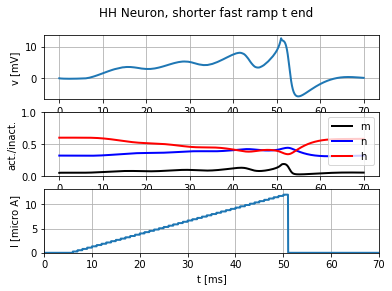

In [215]:
HH.plot_data(state_monitor,title="HH Neuron, shorter fast ramp t end")

### Question

In [212]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 88  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(
    50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

voltage_fast=0.00620703566781072


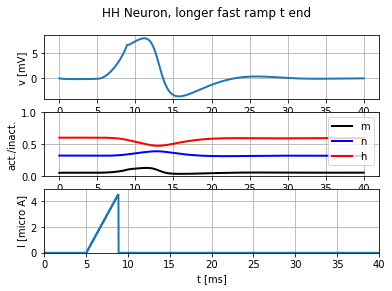

In [213]:
HH.plot_data(state_monitor,title="HH Neuron, longer fast ramp t end")

### Question

comparing **slow ramp current** to **fast ramp current**,
slow ramp current leaks more electron at the ramp interval.

$m$ increases more slowly and fluctuates,$h$ decreases more slowly and fluctuates,$n$ increases more slowly and fluctuates.

## Exercise: Rebound Spike

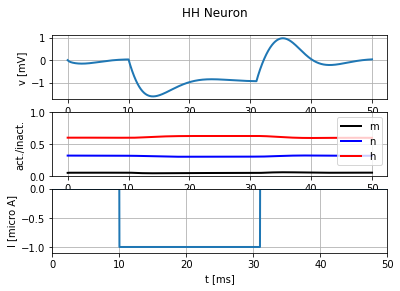

In [216]:
b2.defaultclock.dt = 0.02*b2.ms
I_amp=-1*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_amp)
state_monitor = HH.simulate_HH_neuron(step_current, 50 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

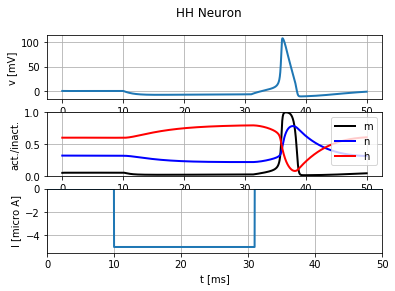

In [217]:
b2.defaultclock.dt = 0.02*b2.ms
I_amp=-5*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_amp)
state_monitor = HH.simulate_HH_neuron(step_current, 50 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

In [218]:
%pfile HH.simulate_HH_neuron

In [250]:
def mine_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens # founded
    gNa = 120*1.4 * b2.msiemens # founded 
    #desity of sodium channels, increase it by a factor of 1.4
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

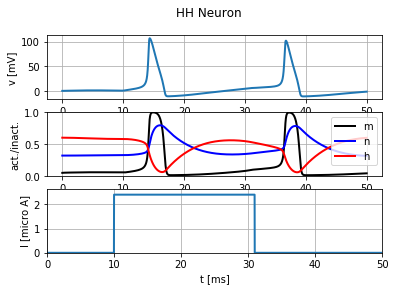

In [268]:
# object 1
I_rep=2.4*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_rep)
state_monitor = mine_simulate_HH_neuron(step_current, 50 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

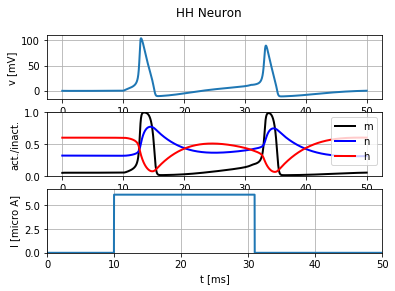

In [291]:
I_rep=6.1*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_rep)
state_monitor = HH.simulate_HH_neuron(
    step_current, 50 * b2.ms)#original situation
HH.plot_data(state_monitor,title="HH Neuron")

WARNING    /usr/local/lib64/python3.7/site-packages/matplotlib/axes/_base.py:1718: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  self.set_ylim([v[2], v[3]], emit=emit, auto=False)
 [py.warnings]


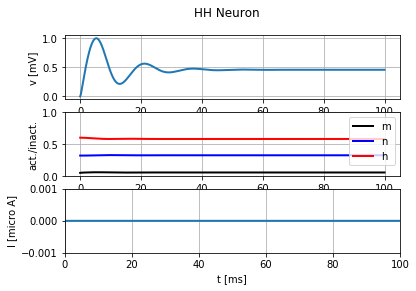

In [279]:
# object 2
I_rep=0*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_rep)
state_monitor = mine_simulate_HH_neuron(step_current,100 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

http://www.cnbc.cmu.edu/~bard/passive2/node3.html

Approximate the GHK equations by a linearized version:
$$V_{eq}=\frac{g_{Na} E_{Na}+g_{K} E_{K}+g_{Cl} E_{Cl}}{g_{Na}+g_{K}+g_{Cl}}$$

In [293]:
El = 10.6 * b2.mV
EK = -12 * b2.mV
ENa = 115 * b2.mV
gl = 0.3 * b2.msiemens
gK = 36 * b2.msiemens # founded
gNa = 120*1.4 * b2.msiemens # founded 

# El = -65 * b2.mV
# EK = -77 * b2.mV
# ENa = 55 * b2.mV
# gl = 0.3 * b2.msiemens
# gK = 36 * b2.msiemens # founded
# gNa =120*1.4 * b2.msiemens # founded

(gNa*ENa+gK*EK+gl*El)/(gNa+gK+gl)

92.46784141 * mvolt

In [288]:
# object 3
def mine_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens # founded
    gNa = 120*1.8 * b2.msiemens # founded 
    #desity of sodium channels, increase it by a factor of 2
    #increasing the sodium conductance further
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

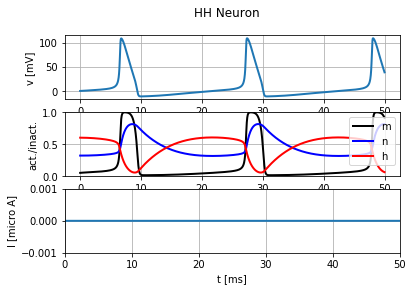

In [289]:
I_rep=0*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I_rep)
state_monitor = mine_simulate_HH_neuron(
    step_current, 50 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")